## Starting Off:

Imaigne you are tyring to determine the price to sell your house for. What featueres do you think woiuld be important in determining that price?

# Data Preparation and Feature Engineering 

## Data Preparation

This consists of cleaning up and modifying your current variables to make them more usable within the model.  This could include:

- Changing the data type to something usable. 
    - *Converting a string '3' to float 3*
    - *Creating dummy variables*
    - *Converting a time date stamp to a usable format
- Removing outliers
- Handling missing data
    - Removing observations with missing data points.
    - Substituting in another value for the missing value.
    

In [1]:
import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
pd.set_option('display.max_columns', 300)

In [2]:
df = pd.read_csv('kc_house_data.csv',index_col='id')


In [3]:
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,,,,,,,,,,,,,,,,,,,,
7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [4]:
df.dtypes

date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

In [10]:
df['date'].head()

id
7129300520    20141013T000000
6414100192    20141209T000000
5631500400    20150225T000000
2487200875    20141209T000000
1954400510    20150218T000000
Name: date, dtype: object

In [4]:
df['date'] = pd.to_datetime(df['date'])

In [5]:
df['date'].head()

id
7129300520   2014-10-13
6414100192   2014-12-09
5631500400   2015-02-25
2487200875   2014-12-09
1954400510   2015-02-18
Name: date, dtype: datetime64[ns]

Previously we've dealt with the date of year built by subtracting the year this data was released to create a column showing how many years old the data is.  

In [6]:
df['yr_old']=2017 - df['yr_built']


In [7]:
df['year_sold'] = df['date'].map(lambda x: x.year )

In [8]:
df['year_sold'].head()

id
7129300520    2014
6414100192    2014
5631500400    2015
2487200875    2014
1954400510    2015
Name: year_sold, dtype: int64

## Removing Outliers

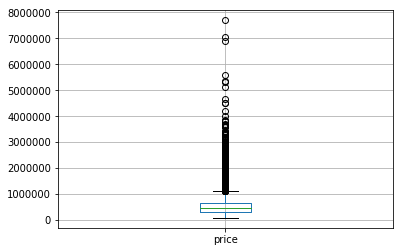

In [18]:
df.boxplot(['price'])

In [9]:
df = df[df['price']<4000000]

https://towardsdatascience.com/ways-to-detect-and-remove-the-outliers-404d16608dba

## Handling Missing Data:
    
Imagine that the 'grade' value was missing from 15% of your data. You don't want to drop those observations becasue  it is a significant chunk of your data.  Also you did some data exploration and you realize that the 'grade' tends to be missing more for smaller  and  older houses.  

**How would you go about filling in the missing grade values?**

## Capturing Non-linear relationships



We can model non-linear relationships in a linear regression model by creating non-linear transformations of the data.

In [10]:
import seaborn as sns
import matplotlib

import matplotlib.pyplot as plt

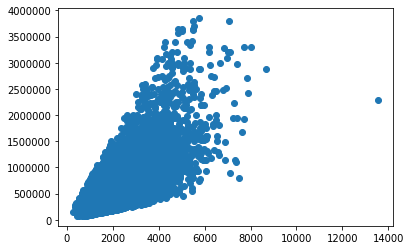

In [11]:
plt.scatter(df['sqft_living'], df['price']);

In [14]:


#histogram and normal probability plot
sns.distplot(df['price'], fit=norm, bins=50, kde=False);
fig = plt.figure()
res = stats.probplot(df['price'], plot=plt)


NameError: name 'norm' is not defined

In [23]:
df['price_log'] = np.log(df['price'])


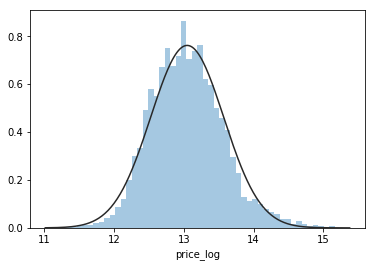

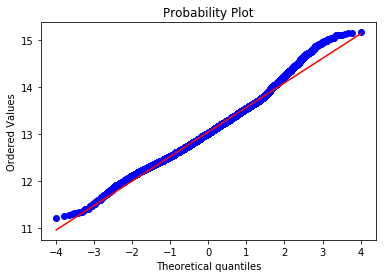

In [24]:
#transformed histogram and normal probability plot
sns.distplot(df['price_log'], fit=norm,  bins=50, kde=False);
fig = plt.figure()
res = stats.probplot(df['price_log'], plot=plt)

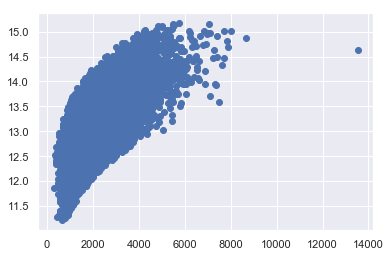

In [30]:
plt.scatter(df['sqft_living'], df['price_log']);

In [31]:
df['sqft_living_log'] = np.log(df['sqft_living'])


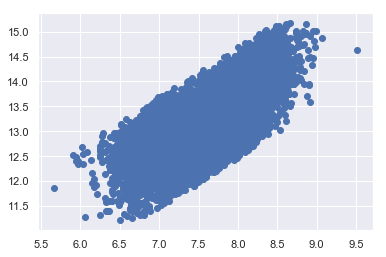

In [32]:
plt.scatter(df['sqft_living_log'], df['price_log']);

***We can now use the natural log of price as our new target variable. We jsut need to undo this transformation after our predictions.***

`np.exp(df['price_log']) `

https://stats.stackexchange.com/questions/260942/transforming-back-after-a-log-transformation

In [ ]:
np.exp(df['price_log']) 


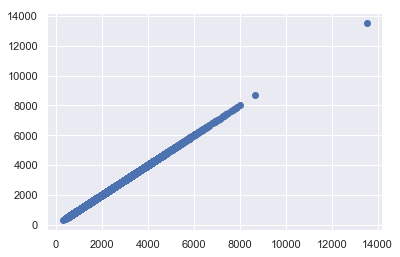

In [35]:
plt.scatter(np.exp(df['sqft_living_log']), df['sqft_living']);

## Polynomial Features 
<img src='noisy-sine-third-order-polynomial.png' width=500 />


### Interaction terms

Interaction terms help to capture the relationship between two variables when that relationship could be dependent on another variable.  

**For example**,  what do you think the relationships between temperature and Citibike rentals is?

Is that relationship alwasy consistent?

**FYI** - You can use interactions for both continuous variables and categorical/dummy variables

**Question:** Thinking about the features that impact housing prices, what are two possible features that could be interacted with eachother to better show the relationship to the final price?

## Geospatial Data

This dataset currently comes with the latitude and longitude of each house. This is probably not that useful for us. So now we need  to think about how to transform this data into something more useful.

Looking at the map below, which aparment might cost more to rent 1  or 2?
Why?

<img src='geospatial_vars.png'/>

Looking at this map of Seattle, how could  we transform lat and long into a more useful data point?

<img src="seattle.png" />

## Time Aggregations:

Imagine this situation. 

You are trying to predict sales for a bar in Williamsburg that has an outdoor patio. You know that weather impacts the sales and want to include it in your features.  

Right now you have weather data at a hourly level, but your sales data is at a daily level. How should we aggregate/convert our hourly data into our daily data?

**EX:** For temperature, I believe that what is most important is how warm it got that day, so I take my hourly data and `resample`  it to give me the max for the day.  

```df['temp'].resample('D').max()```

### Question
Now let's think about this for rain.  Talk with your partner and come up with 3 ways that you can take hourly rain measurements and aggregate it up to a daily level. 

***Hint:*** The outdoor space is primarily used from 12-8pm.  